<a href="https://colab.research.google.com/github/MakarRybkin/Titanic_Kaggle/blob/davydova-liza/Titanic_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightgbm catboost

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("Titanic (1).csv")
df.head()

Saving Titanic (1).csv to Titanic (1) (3).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Новый раздел

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Таблица имеет мнформацию о 891 пассажире.  
12 столбцов:  
0 - id - нет пропусков;  
1 - выжил (1) или нет (0) - нет пропусков;  
2 - класс билета - 1-3 - пропусков нет;  
3 - имя - пропусков нет;  
4 - пол - проупсков нет;  
5 - возраст - 177 пропуссков;  
6 - количесво братьев, сестер, супргу на борту - нет пропусков;  
7 - количесво родителей и детей на борту - нет пропусков;  
8 - номер билета - нет пропусков;  
9 - стоймость билета - нет пропусков;  
10 - каюта - 687 пропусков;  
11 - порт посадки - 2 пропуска;  
  
можно сдеать выводы о том, что не выжило около 62% пассажиров, большинство пассажиров из 2 и 3 класса.


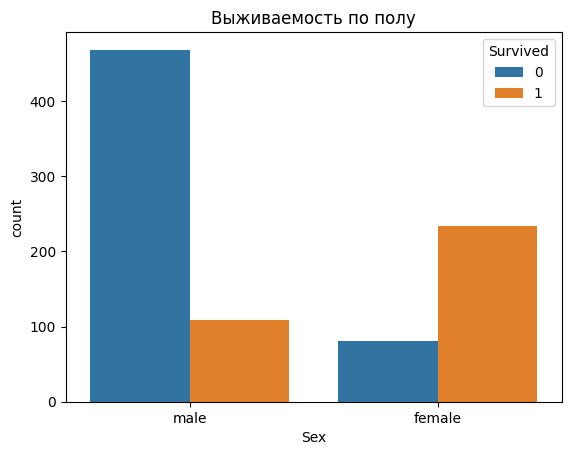

In [ ]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выживаемость по полу')
plt.show()

По этому графику можно сделать вывод, что процент выюивших женщин был выше, чем процент выживших мужчин.

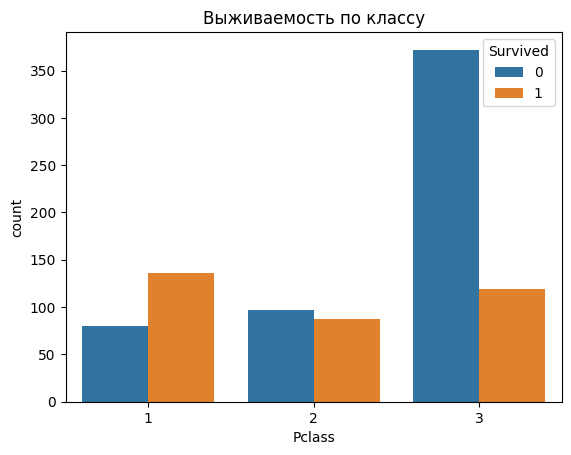

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Выживаемость по классу')
plt.show()

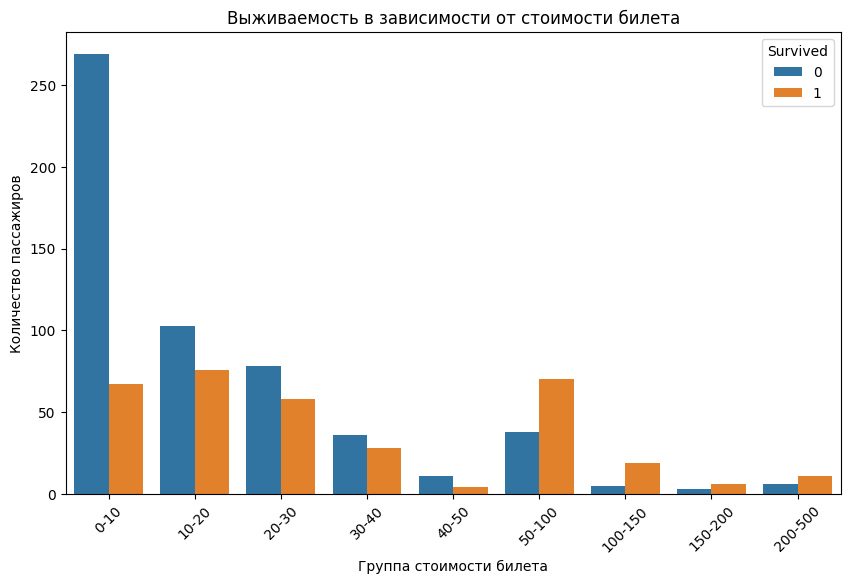

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 100, 150, 200, 500]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-150', '150-200', '200-500']  # Метки для интервалов

# Добавляем новую колонку в DataFrame с интервалами
df['Fare_group'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)

# График выживаемости по стоимости билета
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fare_group', hue='Survived')
plt.title('Выживаемость в зависимости от стоимости билета')
plt.xlabel('Группа стоимости билета')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.show()

Процент выживших стал превышать процент умерших при стоймсоти билета свыше 50 доларов.

# Feature Engineering


In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

Колонка **Титул** поможет узнать был ли человек в браке или нет

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Колонка **Размер Семьи** - будет указывать на количество членов этой семьи пасажира на борту

In [ ]:
df['CabinLetter'] = df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'NaN')

Колонка **Буква Каюты** - вероятно, указывает на расположение каюты

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_group,Title,FamilySize,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0-10,Mr,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-100,Mrs,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0-10,Miss,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-100,Mrs,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0-10,Mr,1,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0-10,Mr,1,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50-100,Mr,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,20-30,Master,5,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,10-20,Mrs,3,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,30-40,Mrs,2,NaN


# Эксперименты с моделями

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

features = ['Sex', 'Pclass', 'Title', 'FamilySize', 'Fare', 'Age']
X = pd.get_dummies(df[features])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-135-74af3bb99f93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [ ]:
y_prob_random_forest = model_random_forest.predict_proba(X_test)[:, 1]
y_pred_random_forest = model_random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
print(f'Accuracy of Random Forest: {accuracy_random_forest}')
print(f'ROC AUC of Random Forest: {roc_auc_random_forest}')
print(f'Precision of Random Forest: {precision_random_forest}')
print(f'Recall of Random Forest: {recall_random_forest}')


Accuracy of Random Forest: 0.8212290502793296
ROC AUC of Random Forest: 0.883976833976834
Precision of Random Forest: 0.8088235294117647
Recall of Random Forest: 0.7432432432432432


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 10, 30, 50, 70, 100],
    'min_samples_leaf': [1, 5, 10, 20, 50]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print(f"Лучшая точность (cross-val): {grid.best_score_:.4f}")

decision_tree_model = grid.best_estimator_

Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность (cross-val): 0.8174


In [ ]:
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Recall of Decision Tree: {recall_decision_tree}')

Accuracy of Decision Tree: 0.8212290502793296
ROC AUC of Decision Tree: 0.8654440154440155
Precision of Decision Tree: 0.7837837837837838
Recall of Decision Tree: 0.7837837837837838


In [ ]:
param_grid = {
    'n_neighbors': list(range(3, 31, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print(f"Лучшая точность (cross-val): {grid.best_score_:.4f}")

knn_model = grid.best_estimator_

Лучшие параметры: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Лучшая точность (cross-val): 0.7851


In [ ]:
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
print(f'Accuracy of knn: {accuracy_knn}')
print(f'ROC AUC of knn: {roc_auc_knn}')
print(f'Precision of knn: {precision_knn}')
print(f'Recall of knn: {recall_knn}')

Accuracy of knn: 0.7653631284916201
ROC AUC of knn: 0.8232947232947233
Precision of knn: 0.7285714285714285
Recall of knn: 0.6891891891891891


In [ ]:
logistic_regression_model = LogisticRegression(max_iter=40)
logistic_regression_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=40)

In [ ]:
y_prob_logistic_regression = logistic_regression_model.predict_proba(X_test)[:, 1]
y_pred_logistic_regression = logistic_regression_model.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
roc_auc_logistic_regression = roc_auc_score(y_test, y_prob_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
print(f'Accuracy of Logistic Regression: {accuracy_logistic_regression}')
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic_regression}')
print(f'Precision of Logistic Regression: {precision_logistic_regression}')
print(f'Recall of Logistic Regression: {recall_logistic_regression}')

Accuracy of Logistic Regression: 0.8100558659217877
ROC AUC of Logistic Regression: 0.8832689832689833
Precision of Logistic Regression: 0.7777777777777778
Recall of Logistic Regression: 0.7567567567567568


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(learning_rate=0.05, max_depth=6, random_state=42)

In [ ]:
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_prob_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
print(f'Accuracy of lgb: {accuracy_lgb}')
print(f'ROC AUC of lgb: {roc_auc_lgb}')
print(f'Precision of lgb: {precision_lgb}')
print(f'Recall of lgb: {recall_lgb}')

Accuracy of lgb: 0.8100558659217877
ROC AUC of lgb: 0.8930501930501931
Precision of lgb: 0.7941176470588235
Recall of lgb: 0.7297297297297297


In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.05,
    verbose=0,
    random_state=42
)

cat_model.fit(X_train, y_train)

In [ ]:
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]
y_pred_cat = cat_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
roc_auc_cat = roc_auc_score(y_test, y_prob_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
print(f'Accuracy of cat: {accuracy_cat}')
print(f'ROC AUC of cat: {roc_auc_cat}')
print(f'Precision of cat: {precision_cat}')
print(f'Recall of cat: {recall_cat}')

Accuracy of cat: 0.8268156424581006
ROC AUC of cat: 0.8988416988416988
Precision of cat: 0.8208955223880597
Recall of cat: 0.7432432432432432


Нейронная сеть


In [ ]:
features = ['Sex', 'Pclass', 'Title', 'FamilySize', 'Fare', 'Age']
X = df[features]
X_encoded = pd.get_dummies(X, columns=['Sex', 'Title'], drop_first=True, dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

print(X_train.dtypes)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Pclass                  int64
FamilySize              int64
Fare                  float64
Age                   float64
Sex_male              float32
Title_Col             float32
Title_Don             float32
Title_Dr              float32
Title_Jonkheer        float32
Title_Lady            float32
Title_Major           float32
Title_Master          float32
Title_Miss            float32
Title_Mlle            float32
Title_Mme             float32
Title_Mr              float32
Title_Mrs             float32
Title_Ms              float32
Title_Rev             float32
Title_Sir             float32
Title_the Countess    float32
dtype: object


In [ ]:
import torch.nn as nn

class TitanicNet(nn.Module):
    def __init__(self, input_size):
        super(TitanicNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1]
model = TitanicNet(input_dim)


In [ ]:
import torch.optim as optim

# Функция потерь и оптимизатор
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/30, Loss: 16.7715
Epoch 2/30, Loss: 15.9479
Epoch 3/30, Loss: 14.9868
Epoch 4/30, Loss: 14.7724
Epoch 5/30, Loss: 14.1531
Epoch 6/30, Loss: 13.9805
Epoch 7/30, Loss: 14.7329
Epoch 8/30, Loss: 14.1428
Epoch 9/30, Loss: 13.3901
Epoch 10/30, Loss: 13.4395
Epoch 11/30, Loss: 13.5268
Epoch 12/30, Loss: 12.7942
Epoch 13/30, Loss: 12.7037
Epoch 14/30, Loss: 12.5294
Epoch 15/30, Loss: 12.6717
Epoch 16/30, Loss: 12.2546
Epoch 17/30, Loss: 11.5890
Epoch 18/30, Loss: 12.1072
Epoch 19/30, Loss: 11.8218
Epoch 20/30, Loss: 11.6662
Epoch 21/30, Loss: 11.3174
Epoch 22/30, Loss: 11.1448
Epoch 23/30, Loss: 11.5857
Epoch 24/30, Loss: 11.8447
Epoch 25/30, Loss: 11.1527
Epoch 26/30, Loss: 10.7725
Epoch 27/30, Loss: 11.0696
Epoch 28/30, Loss: 11.0994
Epoch 29/30, Loss: 11.0450
Epoch 30/30, Loss: 11.1742


In [ ]:
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    predicted = (preds >= 0.5).float()
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Accuracy on test set: {accuracy.item():.4f}')


Accuracy on test set: 0.7933
